# 7-8. 프로젝트 : 나랑 닮은 연예인을 찾아보자

## Step1. 사진 모으기   

비교하려면 사진을 모아야겠죠? 우선 나만 볼 테니 내 사진과 비교해 보고 싶은 연예인 사진을 모아봅시다. 평소에 닮았다고 생각했던 연예인 사진들을 모두 모아보는 것도 좋을 것 같네요.
사진을 하나의 디렉토리 안에 모아 봅시다. 모을 때 사진의 파일명은 가급적 장동건.jpg, 김태희.png와 같이 파일명이 사람 이름이 들어 있도록 하는 것이 좋습니다. (설마 이분들과 닮았다고 생각하시는 것은?? 😅)

### 1. 내 사진 찍기  


    내 사진을 2장 이상 포함합시다.   
    내 사진들끼리의 얼굴 임베딩 벡터 거리를 구해 봅시다. 닮았음을 확인할 수 있는 좋은 베이스라인이 될 수 있습니다.   
    혹시 내 사진들끼리의 거리가 멀게 나온다면 왜 그럴지 생각해 봅시다.   


[(726, 849, 1281, 295)]


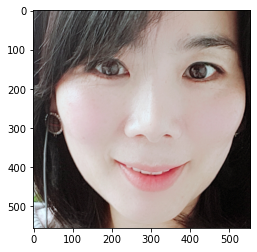

In [1]:
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding/my_images/유정1.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

#### 샘플 이미지의 유정1.jpg를 불러온 후 얼굴을 face_recognition.face_locations를 사용해 찾아줍니다. 그렇게 박스를 찾게 되면 임베딩 추출을 할 이미지를 만들기 위해서 잘라줍니다. 얼굴 부분만 잘 가져왔네요.

In [2]:
import face_recognition
import os 

def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

#### 이미지 경로를 따라 얼굴 영역만 잘라서 제공해주는 함수를 만들어 보았습니다.

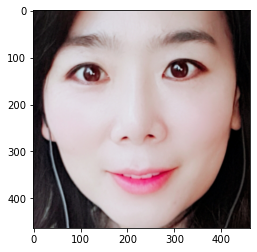

In [3]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/my_images/이유정.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

#### 얼굴 영역만 잘 가져오네요. 뉘집 자식인지 참 이뿌네 그려... 콜록

In [4]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/my_images'

file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['유정1.jpg', '이유정.jpg']


#### 저장해둔 my_images 디렉토리에 있는 이미지들을 확인해보니 3장의 이미지가 있네요.

In [5]:
image_file = os.path.join(dir_path, '유정1.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.07616374,  0.06806734,  0.05179534, -0.06555515, -0.0966922 ,
        -0.01651306, -0.08269056, -0.068014  ,  0.08576033, -0.10025131,
         0.24942081, -0.13744728, -0.23646209, -0.06637953, -0.04745358,
         0.21246168, -0.21740124, -0.1341525 , -0.02150167,  0.02550375,
         0.11259745,  0.02391379, -0.01105087,  0.06606225, -0.17043352,
        -0.36185429, -0.08854771, -0.07882941, -0.09957615, -0.11134738,
        -0.05382681,  0.01572272, -0.18444288,  0.007888  ,  0.0663981 ,
         0.08502237, -0.00276391, -0.12071042,  0.11744052,  0.02657831,
        -0.29180101,  0.07925108,  0.10508608,  0.23272586,  0.14909835,
         0.00608204, -0.01714893, -0.16440882,  0.09930164, -0.19596995,
         0.00220799,  0.16135813,  0.04348332,  0.03821441,  0.02117387,
        -0.08137812,  0.0074199 ,  0.10514358, -0.15929285, -0.02822914,
         0.08654815, -0.06720078, -0.02295443, -0.16175503,  0.19617748,
         0.12402228, -0.15609665, -0.24096701,  0.0

#### 유정1.jpg에 포함된 얼굴 영역의 임베딩 벡터를 구해보니 128차원의 벡터가 구해졌네요.

In [6]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

#### my_images 디렉토리 안에 있는 모든 이미지 파일의 임베딩을 구해서 dict 구조에 담아 리턴하는 함수를 만들었습니다. 딕셔너리의 각 엘리먼트는 사람 이름:임베딩벡터로 하겠습니다. 

In [7]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['이유정']

array([-0.10587619,  0.05662832,  0.05308302, -0.05290276, -0.05625319,
       -0.02961333, -0.07415882, -0.10711092,  0.1227529 , -0.14381362,
        0.2178845 , -0.12893984, -0.22048436, -0.04061156, -0.05467185,
        0.21019243, -0.23607299, -0.11985216, -0.02697106,  0.00109555,
        0.10889469,  0.03794955, -0.00402568,  0.06848847, -0.12198298,
       -0.34257913, -0.08797047, -0.08493491, -0.01516982, -0.08706657,
       -0.06779758,  0.03386599, -0.16413257,  0.0052634 ,  0.03381684,
        0.09912138,  0.02247486, -0.11900626,  0.15367796,  0.02014213,
       -0.25488386,  0.06507094,  0.05901808,  0.24010837,  0.16883764,
       -0.01300941, -0.02611496, -0.15229884,  0.12451188, -0.17176056,
       -0.04843319,  0.148514  ,  0.03029987,  0.05785304,  0.03505246,
       -0.10625044,  0.02860072,  0.06556769, -0.13589746, -0.03127066,
        0.0548257 , -0.07762419, -0.01429455, -0.12115683,  0.19406602,
        0.07800517, -0.10419156, -0.23943883,  0.1051238 , -0.15

#### get_face_embedding_dict() 함수가 잘 만들어진듯 합니다.

In [8]:
import numpy as np

In [9]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('유정1', '이유정')

0.29222016870792034

####  임베딩 값이 비교적 작은걸 보니 같은 사람임을 잘 구분 해 내는듯 합니다. 

### 2. 비교할 연예인 사진 모으기   


    많이 모을수록 나와 더 닮은 연예인을 찾을 가능성이 높아질 것입니다.   
    주위의 동료들과 모은 사진을 주고받는 것도 하나의 방법입니다.   


#### 정수희 학우님이 올려주신 데이터가 주로 남자 사진이라  조금 손질하고 개별적으로 이미지를 좀더 받아서 81개의 이미지를 준비했습니다.

## Step2. 얼굴 영역 자르기   

임베딩 추출을 위해서는 얼굴 영역을 잘라줘야 합니다. 위 Step1.에서 찾은 이미지들을 이전에 만들었던 get_gropped_face(image_file)을 통해서 잘라줍시다! 자른 이미지는 PIL의 Image.fromarray를 통해서 PIL Image로 변환한 뒤에 저장을 해두면 다양한 재미있는 시각화를 시도해 보는 데 도움이 될 것입니다. 

In [10]:
import face_recognition
import os

def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

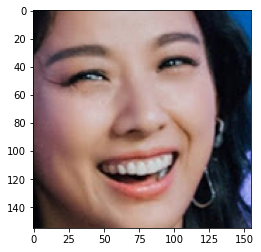

In [11]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/이효리.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

In [12]:
import PIL
from PIL import Image
path_to_save = os.getenv('HOME')+'/aiffel/face_embedding/pil_celebrity/'

face = get_gropped_face(image_path)
pillow_image = Image.fromarray(face)
pillow_image.save(path_to_save + "이효리.jpeg")

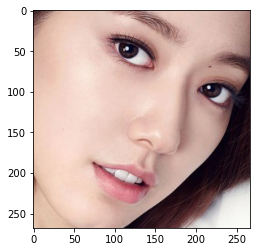

In [13]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/박신혜.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

In [14]:
import PIL
from PIL import Image
path_to_save = os.getenv('HOME')+'/aiffel/face_embedding/pil_celebrity/'

face = get_gropped_face(image_path)
pillow_image = Image.fromarray(face)
pillow_image.save(path_to_save + "박신혜.jpeg")

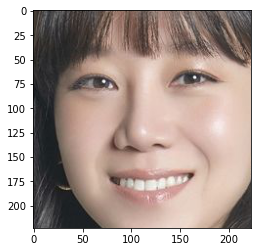

In [15]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/공효진.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

In [16]:
import PIL
from PIL import Image
path_to_save = os.getenv('HOME')+'/aiffel/face_embedding/pil_celebrity/'

face = get_gropped_face(image_path)
pillow_image = Image.fromarray(face)
pillow_image.save(path_to_save + "공효진.jpeg")

#### 준비된 연애인들 사진중 몇장을 get_gropped_face(image_file)을 통해서 잘라주고  PIL Image로 변환한 뒤에 저장을 해 두었습니다. 그런데 여기서 의문점이 생겼어요. 이렇게 일일이 하나씩 파일을 자르고 변환해야 하나? 이걸 한번에 할수는 없을까? 너무 귀찮다 ㅜㅜ. 하지만 아직 파이썬에 초보인 저는 알수가 없었습니다. 아무리 구글링을 해도 찾을수가 없어서 그냥 무시하고 넘어가게 되네요. 아! 빨리 벗어나고 싶다.

## Step3. 얼굴 영역의 임베딩 추출하기   

이제 얼굴 영역으로 잘린 이미지들이 여럿 생겼을 텐데요. 그 이미지를 face_recognition 을 사용해서 이미지를 불러오고 임베딩을 추출해 봅시다. 다른 사람의 임베딩은 구분할 수 있게 따로 저장해 주세요. 이전에 만들었던 다음 함수들을 활용하면 손쉽게 수행 가능합니다.   


    def get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수    
    def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수    


In [17]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['윤아.jpg', '서현진.jpg', '미미.jpg', '아이유.jpg', '장원영.jpg', '하현우.jpg', '채연.jpg', '하지원.jpg', '한예슬.jpg', '손예진.jpg', '승희.jpg', '리아.jpg', '김남주.jpg', '제니.jpg', '박나래.jpg', '리사.jpg', '트와이스정연.jpg', '류진.jpg', '한가인.jpg', '천우희.jpg', '트와이스사나.jpg', '아이즈원김채원.jpg', '한효주.jpg', '이유정.jpg', '러블리즈지수.jpg', '잇지예지.jpg', '태연.jpg', '공효진.jpg', '유리.jpg', '로제.jpg', '문별.jpg', '조이.jpg', '장도연.jpg', '여자아이들수진.jpg', '수지.jpg', '티파니.jpg', '아이즈원민주.jpg', '민니.jpg', '트와이스모모.jpg', '아린.jpg', '지호.jpg', '이효리.jpg', '효정.jpg', '나인뮤지스경리.jpg', '케이.jpg', '레드벨벳웬디.jpg', '트와이스다현.jpg', '트와이스쯔위.jpg', '김고은.jpg', '러블리즈예인.jpg', '박보영.jpg', '매드클라운.jpg', '아이즈원조유리.jpg', '화사.jpg', '비니.jpg', '전도연.jpg', '강민경.jpg', '무라니시.png', '사쿠라.jpg', '김유정.jpg', '김성령.jpg', '우기.jpg', '한지민.jpg', '김희선.jpg', '슬기.jpg', '박신혜.jpg', '김성연.jpg', '지수.jpg', '강미나.jpg', '전소미.jpg', '잇지유나.jpg', '트와이스나연.jpg', '도아.jpg', '크리스탈.jpg', '솔라.jpg', '유아.jpg', '문근영.jpg', '트와이스미나.jpg', '신비.jpg', '김사랑.jpg', '레인보우재경.jpg', '아이린.jpg']


#### 이번 프로젝트에 쓸 연예인들 이미지를 가져와 보니 제 사진을 포함해서 82개의 이미지가 저장되어 있습니다

In [18]:
image_file = os.path.join(dir_path, '한지민.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.05760944,  0.10919873,  0.06369946, -0.09578758, -0.10559036,
        -0.0091881 , -0.10814156, -0.12103712,  0.12003755, -0.17717847,
         0.18772055, -0.09188902, -0.23090972, -0.02578393, -0.03050435,
         0.22280461, -0.23555639, -0.16718177, -0.0370924 ,  0.0176351 ,
         0.06852071,  0.07970663,  0.00070186,  0.05272336, -0.13063453,
        -0.36026913, -0.12505363, -0.0773951 , -0.02942882, -0.07106145,
        -0.04905906,  0.02030099, -0.18593003,  0.00139378,  0.0476797 ,
         0.11359505,  0.0028956 , -0.12270278,  0.08981476, -0.00863943,
        -0.26479605,  0.1062611 ,  0.09877073,  0.21909958,  0.18908952,
         0.00826822, -0.0037163 , -0.15042675,  0.10876964, -0.13250238,
         0.03965328,  0.10686029,  0.0402709 ,  0.08092096,  0.0715114 ,
        -0.14066471,  0.05777185,  0.1234281 , -0.13972427, -0.00267218,
         0.10860872, -0.05098227,  0.07509664, -0.07609831,  0.1831228 ,
         0.04362144, -0.06601585, -0.23376568,  0.1

#### face_recognition.face_encodings() 함수를 통해 한지민.jpg에 포함된 얼굴 영역의 임베딩 벡터를 구해보았습니다.

In [19]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

####  celebrity 디렉토리 안에 있는 모든 이미지 파일의 임베딩을 구해서 dict 구조에 담아 리턴하는 함수를 만들었고 딕셔너리의 각 엘리먼트는 사람 이름:임베딩벡터로 정했습니다.

In [20]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['천우희']

array([-9.00145993e-02,  1.35989964e-01,  2.84192227e-02, -8.01545382e-02,
       -1.76292539e-01, -3.06972414e-02, -7.93937668e-02, -7.61501268e-02,
        1.41033575e-01, -9.73055139e-02,  1.61517292e-01, -9.56309959e-02,
       -2.35863715e-01, -4.63207290e-02, -9.83523503e-02,  2.29716212e-01,
       -2.22690165e-01, -1.76907256e-01, -7.70302489e-04,  1.01014040e-04,
        1.13936409e-01,  1.88335571e-02, -3.56435888e-02,  5.87399453e-02,
       -1.53791666e-01, -3.35180402e-01, -1.05335757e-01, -4.00595181e-02,
       -6.89248517e-02, -9.10796449e-02, -3.15788090e-02,  9.87165272e-02,
       -2.05150560e-01, -3.55167389e-02,  5.87905645e-02,  1.62966251e-01,
        4.04297076e-02, -5.15565388e-02,  1.24236174e-01,  3.38385813e-04,
       -2.81002104e-01,  7.29244649e-02,  1.43421143e-01,  2.55413979e-01,
        1.35470614e-01,  7.20895035e-03,  1.42721385e-02, -1.43609554e-01,
        1.05583593e-01, -1.39666080e-01,  3.92804481e-03,  1.88824907e-01,
        6.74602389e-02,  

#### 함수가 잘 작동하는 것 같습니다

In [21]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('윤아', '서현진')

0.46265318390110255

#### 윤아, 서현진 두 사람의 얼굴 임베딩 사이의 거리(L2 distance)를 구해보니 그래도 아주 나쁘진 않지만 다른 사람임은 분명합니다.

## Step4. 모은 연예인들과 비교하기   

모은 연예인 사진들과 자신의 얼굴 사진에서 추출한 임베딩 벡터들 간의 거리를 비교해 보고 가장 작은 연예인이 누구인지 찾아봅시다!

이전 스텝에서 만들었던 get_nearest_face(name, top=5) 함수들을 응용하면 손쉽게 수행 가능합니다. 

In [22]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('이유정')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('유나') 라고 호출할 때 이유정과 유나 사이의 임베딩 벡터 거리를 계산합니다.

#### name 인자에 특정 사람 이름을 주면 그 사람과 가장 닮은 다른 이미지와 거리 정보를 가장 가까운 순으로 정렬해서 표시해 주는 함수를 만들었습니다. 저와 가장 닮은 연예인을 찾는게 목표 이므로 당연히 name1은 제이름 이유정을 지정해야겠죠?

In [23]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('이유정',
  array([-0.10587619,  0.05662832,  0.05308302, -0.05290276, -0.05625319,
         -0.02961333, -0.07415882, -0.10711092,  0.1227529 , -0.14381362,
          0.2178845 , -0.12893984, -0.22048436, -0.04061156, -0.05467185,
          0.21019243, -0.23607299, -0.11985216, -0.02697106,  0.00109555,
          0.10889469,  0.03794955, -0.00402568,  0.06848847, -0.12198298,
         -0.34257913, -0.08797047, -0.08493491, -0.01516982, -0.08706657,
         -0.06779758,  0.03386599, -0.16413257,  0.0052634 ,  0.03381684,
          0.09912138,  0.02247486, -0.11900626,  0.15367796,  0.02014213,
         -0.25488386,  0.06507094,  0.05901808,  0.24010837,  0.16883764,
         -0.01300941, -0.02611496, -0.15229884,  0.12451188, -0.17176056,
         -0.04843319,  0.148514  ,  0.03029987,  0.05785304,  0.03505246,
         -0.10625044,  0.02860072,  0.06556769, -0.13589746, -0.03127066,
          0.0548257 , -0.07762419, -0.01429455, -0.12115683,  0.19406602,
          0.07800517, -0.1041

#### 이미 모든 임베딩  딕셔너리를 가지고 있으므로 이 딕셔너리를 정렬하는 key로 lambda 함수를 사용합니다.

In [24]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [25]:
# obama와 가장 닮은 사람은 누굴까요?
get_nearest_face('이유정')

순위 1 : 이름(손예진), 거리(0.38401902450758757)
순위 2 : 이름(태연), 거리(0.39069166162382185)
순위 3 : 이름(장도연), 거리(0.4069962360769198)
순위 4 : 이름(전도연), 거리(0.40893882883836186)
순위 5 : 이름(케이), 거리(0.4122367541516368)


## Step5. 다양한 재미있는 시각화 시도해 보기   

비단 닮은 꼴 연예인을 찾기만 할 것이 아니라, 그들의 얼굴 사진을 활용하여 재미있는 시각화를 시도해 보시기 바랍니다.
tkinter나 flask를 활용해서 닮은꼴을 찾을 이미지를 업로드한 후 그 이미지와 닮은 얼굴을 찾는 형태로 구현해 보는 것도 재미있을 것입니다.
여러분들의 재치가 넘치는 작품들을 기대합니다. 😎